<a href="https://colab.research.google.com/github/ranjanguddu/Machine-Learning/blob/master/EVA4/Session-12/Assignmeny_12B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import json
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [0]:
f = open('dog_coco_v2.json')

#open json data as a dictionary
data = json.load(f)


In [0]:
#step 1: create im_coord dictionary
im_coord = {}
for i in data['images']:
    key = str(i['id'])
    im_coord[key] = [i['width'],i['height']]

In [0]:
print(im_coord)


{'0': [410, 308], '1': [500, 333], '2': [375, 500], '3': [500, 333], '4': [190, 286], '5': [500, 375], '6': [500, 348], '7': [250, 263], '8': [487, 500], '9': [250, 188], '10': [500, 375], '11': [450, 338], '12': [435, 594], '13': [500, 333], '14': [500, 375], '15': [400, 539], '16': [500, 334], '17': [200, 150], '18': [500, 380], '19': [500, 334], '20': [500, 333], '21': [500, 445], '22': [500, 375], '23': [400, 286], '24': [500, 378], '25': [512, 514], '26': [375, 500], '27': [375, 500], '28': [500, 375], '29': [500, 333], '30': [500, 334], '31': [333, 500], '32': [500, 432], '33': [500, 375], '34': [375, 500], '35': [305, 230], '36': [333, 500], '37': [308, 550], '38': [210, 201], '39': [500, 333], '40': [500, 375], '41': [500, 375], '42': [500, 319], '43': [500, 332], '44': [500, 375], '45': [500, 375], '46': [500, 375], '47': [500, 375], '48': [334, 500], '49': [500, 375]}


In [0]:
# step 2: create bbox dictionary
bbox_cord = {}
for j in data['annotations']:
    key = j['image_id']
    if key not in bbox_cord:
        bbox_cord[key] = [j['bbox'][2], j['bbox'][3]]
    else:
        bbox_cord[key].append(j['bbox'][2])
        bbox_cord[key].append(j['bbox'][3])

In [0]:
print()    

print(bbox_cord)


{'0': [295, 227], '1': [192, 244], '2': [312, 320], '3': [323, 380], '4': [257, 222], '5': [241, 203], '6': [160, 226], '7': [173, 188], '8': [363, 230], '10': [366, 242], '11': [245, 176], '12': [382, 305], '13': [314, 274], '14': [143, 359], '15': [154, 184], '16': [166, 313], '17': [193, 156], '18': [401, 156], '19': [160, 102], '20': [340, 292], '21': [461, 308], '22': [461, 274], '23': [432, 427], '24': [377, 329], '25': [279, 220], '26': [243, 225], '27': [474, 442], '28': [340, 447], '29': [271, 404], '30': [338, 336], '31': [357, 283], '32': [330, 188], '33': [291, 403], '34': [301, 180], '35': [436, 306], '36': [337, 226], '37': [228, 176], '38': [218, 379], '39': [222, 419], '40': [172, 179], '41': [361, 286], '42': [363, 307], '43': [208, 204], '44': [441, 244], '45': [402, 267], '46': [337, 334], '47': [394, 301], '48': [296, 288], '49': [344, 308]}


In [0]:
# step 3
logw = []
logh = []
for im in im_coord:
    if(len(bbox_cord[im]) == 2):
        #print("Yes")
        logw.append(math.log(bbox_cord[im][0]/im_coord[im][0]))
        logh.append(math.log(bbox_cord[im][1])/im_coord[im][1])
    if(len(bbox_cord[im]) > 2):
        l = 0
        while(l < len(bbox_cord[im])):
            if(l%2 == 0):
                logw.append(math.log(bbox_cord[im][l]/im_coord[im][0]))
                logh.append(math.log(bbox_cord[im][l+1]/im_coord[im][1]))
                
            l+=2

In [0]:
X = np.column_stack((logw,logh))
print(X)

[[-0.3291818   0.01761347]
 [-0.95711273 -0.31097426]
 [-1.27296568 -0.33587182]
 [-0.1492737   0.01188034]
 [-0.72981116  0.01595557]
 [-0.17185026  0.01895292]
 [-1.0613165   0.01396385]
 [-0.32020526  0.01562666]
 [-0.93649344  0.01844878]
 [-0.28563079  0.01097788]
 [-0.02020271  0.02750257]
 [-0.26918749  0.01525416]
 [-0.3598546   0.01660689]
 [-1.1125014  -0.50355693]
 [-0.54591694 -0.24055006]
 [-1.1776555  -0.59320673]
 [-1.65025991 -0.02124511]
 [-1.10262031  0.01532321]
 [-0.72877436 -1.23985956]
 [-1.04270466 -0.07911549]
 [-0.91629073 -0.77628682]
 [-0.22064667  0.01511933]
 [-0.22314355  0.03083315]
 [-0.38566248  0.01493883]
 [-0.08121006  0.01715599]
 [-0.08121006  0.01685624]
 [-0.14618251  0.01361075]
 [-0.28236291  0.01545615]
 [-0.36025277  0.01885884]
 [-0.72154666  0.01432831]
 [-0.0771173   0.0118508 ]
 [-0.09798041  0.01220512]
 [-0.32480721  0.01200283]
 [-0.3915622   0.0155123 ]
 [-0.33687232  0.01695329]
 [-0.41551544  0.01567797]
 [-0.13481922  0.01199787]
 

Text(0, 0.5, 'Normalised bbox height')

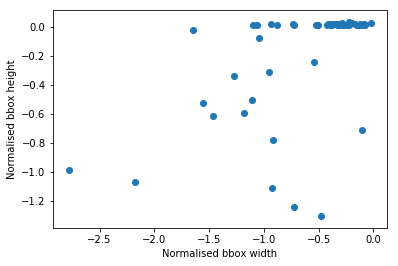

In [0]:
# step 4
plt.scatter(logw,logh)
plt.xlabel("Normalised bbox width")
plt.ylabel("Normalised bbox height")

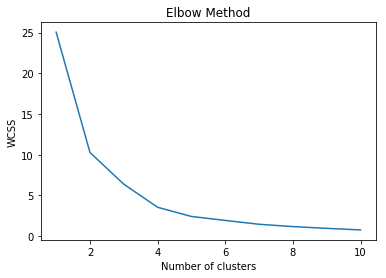

In [0]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**It seems there is 4 no. of cluster**

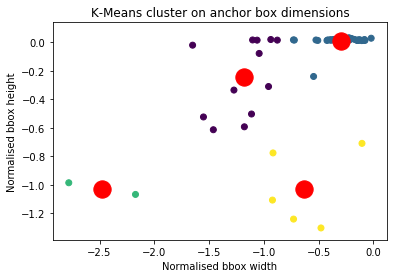

In [0]:
import seaborn as sns

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

legend = []
for i in np.unique(pred_y):
    legend.append('Cluster {0}'.format(i))
    
    
plt.scatter(X[:,0], X[:,1], c=kmeans.fit(X).labels_.astype(float))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.xlabel("Normalised bbox width")
plt.ylabel("Normalised bbox height")
plt.title("K-Means cluster on anchor box dimensions")
plt.show()